Regresión no lineal univariada con perceptrones multicapa
===


* *60 min* | Ultima modificación: Julio 3, 2019

## Definición del problema

Se desea construir un modelo de regresión no lineal para la siguiente muestra de 31 observaciones de $(x, y)$ con el fin de poder interpolar el valor de la variable de respuesta para valores de $x$. 

In [1]:
x = [-3.5000, -3.2941, -3.0882, -2.8824, -2.6765, 
     -2.4706, -2.2647, -2.0588, -1.8529, -1.6471, 
     -1.4412, -1.2353, -1.0294, -0.8235, -0.6176, 
     -0.4118, -0.2059,  0.0000,  0.2059,  0.4118, 
      0.6176,  0.8235,  1.0294,  1.2353,  1.4412, 
      1.6471,  1.8529,  2.0588,  2.2647,  2.4706, 
      2.6765,  2.8824,  3.0882,  3.2941,  3.5000]

d = [ 0.0000,  0.0000,  0.0001,  0.0002,  0.0008,  
      0.0022,  0.0059,  0.0144,  0.0323,  0.0664,  
      0.1253,  0.2174,  0.3466,  0.5075,  0.6828,  
      0.8440,  0.9585,  1.0000,  0.9585,  0.8440,  
      0.6828,  0.5075,  0.3466,  0.2174,  0.1253,  
      0.0664,  0.0323,  0.0144,  0.0059,  0.0022,  
      0.0008,  0.0002,  0.0001,  0.0000,  0.0000]

La siguiente figura muestra que la relación es no lineal entre las variables de entrada ($x$) y salida ($y$).

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, d, 'o')
plt.grid()

## Arquitectura

El perceptrón multicapa se obtiene al agrupar varios perceptrones continuos en capas para luego conectar las capas entre sí, una a continuación de la siguiente. Las neuronas de cada capa se conectan a todas y cada una de las neuronas de la siguiente capa. Solo hay conexiones entre capas adyacentes.

Se consideran tres tipos de capas por su ubicación (véase la figura de abajo):


* Capa de entrada: son nodos que simplemente capturan la información de entrada y la transmiten directamente a la siguiente capa sin realizar ningún tipo de procesamiento. Hay tantas neuronas de entrada como variables considere el modelo. Corresponden a la capa con las entradas $x$ y $y$ de la figura de abajo.


* Capas ocultas de procesamiento: son capas internas usualmente no visibles por el usuario que realizan el procesamiento de la información. En la figura de abajo, hay una sola capa oculta con cuatro neuronas.


* Capa de salida: Entrega la señal de salida al usuario. Tiene tantas neuronas como variables de salida tenga el sistema. En la figura de abajo, corresponde a la neurona de la derecha que da como salida la variable $z$.

Tal como se indicó, en la figura de abajo se presenta el diagrama esquemático para un modelo con dos entradas $(x, y)$, una capa oculta con cuatro neuronas, y una capa de salida.

### Capacidad de aprendizaje

Un perceptrón multicapa puede aproximar cualquier función arbitraria simplemente agregando neuronas a la capa oculta. En la siguiente figura, se muestran las superficies generadas para por cada una de las cuatro neuronas de la capa oculta (las cuatro superficies en forma de S), y como al combinarse en la capa de salida producen la figura de la derecha (que corresponde a la variable $z$).

![alt](assets/MulticapaRegresionUniv-01.png)

Una pregunta fundamental en redes neuronales es la determinación de cuántas capas ocultas y cuántas neuronas por capa oculta deben usarse. En la figura de abajo se presentan las fronteras de decisión para diferentes configuraciones de una red neuronal para resolver un problema de clasificación. 

* Un perceptrón simple puede generar una frontera de decisión lineal (figura de la izquierda). 

* Un perceptrón multicapa puede generar una superficie compacta donde la región sombreada representa una clase y el resto de la superficie representa la otra (figura del centro). Cada uno de los bordes del polígono es generado como la frontera de decisión que produce cada perceptrón de la capa oculta. La neurona de salida implementa la función lógica AND o la función lógica OR. Si cada perceptrón de la capa oculta indica la pertenencia de un punto cualquiera a la región sombreda, entonces la neurona de salida representa un AND (todos los perceptrones de la capa oculta deben indicar que el punto pertenece a la región sombreada). De forma análoga, si los perceptrones de la capa oculta indican la no pertenencia a la región sombreada, entonces, la neurona de salida debe representar un OR. Esto implica (de forma intuitiva) que un perceptrón con una capa oculta puede aproximar cualquier función continua definida en un dominio compacto

* Finalmente, una red con dos capas ocultas puede resolver problemas de clasificación donde los elementos de la clase de interés están aglomerados en distintas regiones (ya no hay un dominio compacto). Si se tiene en cuenta que cada región compacta puede ser generada por u perceptrón con una capa oculta, entonces se requieren dos percptrones los cuales son unidos mediante una capa adicional (al final) que representa un OR lógico.

![alt](assets/MulticapaRegresionUniv-02.png)

### Estimación de los pesos óptimos de la red neuronal

La estimación de los parámetros óptimos se realiza mediante el método del descenso acelerado, usualmente minimizando el error cuadrático medio, tal como ya se ha realizado en muchos de los casos anteriores:

$$
\mathbf{w}(k+1) = \mathbf{w}(k) - \mu \frac{\partial}{\partial\mathbf{w}(k)} \left[ e^2(k)\right]
$$

La dificultad subyace en la estimación del gradiente algebráico de los pesos de las conexiones respecto al error. La derivación del gradiente está fuera del alcance de este documento y se invita al lector a consultar libros especializados sobre el tema.

## Implementación usando Python

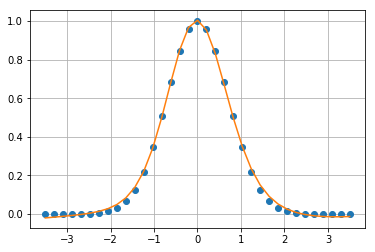

In [3]:
import sklearn.neural_network
import numpy as np

##
## El parámetro hidden_layer_sizes recibe una tupla que
## indica la cantidad de neuronas de cada capa oculta. En
## el caso presentado, el valor (6,) indica que hay una sola
## capa oculta con 6 neuronas que usan la función sigmoidea.
## El parámetro solver = 'sgd' indica que se usará el 
## algoritmo de gradiente descendente estocástico para entrenar
## la red neuronal. 
##

m = sklearn.neural_network.MLPRegressor(
                 hidden_layer_sizes = (6,),  # Una capa oculta con una neurona
                 activation = 'logistic',    #  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
                 solver = 'sgd',             #  {‘lbfgs’, ‘sgd’, ‘adam’}
                 alpha = 0.0,                #
                 learning_rate_init = 0.1,   # Valor de la tasa de aprendizaje
                 learning_rate = 'constant', # La tasa no se adapta automáticamente
                 verbose = False,            # Reporte del proceso de optimización
                 shuffle = True,             #
                 tol = 1e-8,                 #
                 max_iter = 25000,           # Número máximo de iteraciones
                 momentum = 0.0,             # 
                 nesterovs_momentum = False) #

X = [[u] for u in x]                         # Scikit espera una lista de listas
m.fit(X, d)                                  # Entrena el modelo

plt.plot(x, d, 'o');
plt.grid()
plt.plot(x, m.predict(X), '-');

En esta caso se usa la libraría `neuralnet` la cual ha sido ampliamente usada.